In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Feature Description

ph: pH of 1. water (0 to 14).

Hardness: Capacity of water to precipitate soap in mg/L.

Solids: Total dissolved solids in ppm.

Chloramines: Amount of Chloramines in ppm.

Sulfate: Amount of Sulfates dissolved in mg/L.

Conductivity: Electrical conductivity of water in μS/cm.

Organic_carbon: Amount of organic carbon in ppm.

Trihalomethanes: Amount of Trihalomethanes in μg/L.

Turbidity: Measure of light emiting property of water in NTU.

Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [4]:
data=pd.read_csv('water_potability.csv')
data=pd.DataFrame(data)

In [5]:
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# 결측치 처리(ph, Sulfate, Trihalomethanes)

- 1. dropna(null값을 포함한 데이터는 drop한다) => 데이터가 1526개로 약 절반가량으로 줄어든다.=> 정확도가 떨어는것을 확인함
- 2. null값이 있는 column을 drop한다.=> feature가 9개에서 6개로 줄어든다.=> 정확도가 떨어지는것을 확인함
- 3. Feature의 평균값 또는 중앙값으로 대체한다.

In [8]:
# 결측치 평균값으로 대체

data.loc[(data['Potability'] == 0) & (data['ph'].isna()), 'ph'] = data[data['Potability'] == 0]['ph'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['ph'].isna()), 'ph'] = data[data['Potability'] == 1]['ph'].mean(skipna=True)


data.loc[(data['Potability'] == 0) & (data['Sulfate'].isna()), 'Sulfate'] = data[data['Potability'] == 0]['Sulfate'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Sulfate'].isna()), 'Sulfate'] = data[data['Potability'] == 1]['Sulfate'].mean(skipna=True)


data.loc[(data['Potability'] == 0) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = data[data['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = data[data['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)

In [9]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

### Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler
sclaer=StandardScaler()
X_train=sclaer.fit_transform(X_train)
X_test=sclaer.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [12]:
X_train=X_train.rename(columns={0:'ph',1:'Hardness', 2:'Solids',3:'Chloramines',4:'Sulfate', 5:'Conductivity',6:'Organic_carbon',7:'Trihalomethanes', 8:'Turbidity'})
X_test=X_test.rename(columns={0:'ph',1:'Hardness', 2:'Solids',3:'Chloramines',4:'Sulfate', 5:'Conductivity',6:'Organic_carbon',7:'Trihalomethanes', 8:'Turbidity'})

In [13]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

### Machine Learning
- Modeling

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2293, 9), (983, 9), (2293, 1), (983, 1))

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


models_acc = []
models = [DecisionTreeClassifier(), LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), GaussianNB(), SVC()]
for model in models:
    model.fit(X_train, y_train)    
    pred = model.predict(X_test)
    models_acc.append(accuracy_score(y_test, pred))

/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/var/folders/br/3dqwpjqx4f71f757xh3fx8g80000gn/T/ipykernel_51133/2796147438.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a

In [16]:
Model_list = pd.DataFrame({
    'Model Accuracy': models_acc, 
    "Model Name": ['DecisionTreeClassifier','LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'SVC']
})
Model_list

,Model Accuracy,Model Name
0,0.582909,DecisionTreeClassifier
1,0.624619,LogisticRegression
2,0.625636,KNeighborsClassifier
3,0.804680,RandomForestClassifier
4,0.610376,GaussianNB
5,0.680570,SVC


### Gridsearch

In [17]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=0)
#파라미터 후보 - 딕셔너리(key: 하이퍼 파라미터 이름, value: 후보리스트)
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[2 ,4, 6, 8],
    'min_samples_split':[2 ,4, 6,8]
}

grid_search = GridSearchCV(rfc, #모델
                           param_grid=param_grid, #하이퍼 파라미터 후보
                           scoring='accuracy',# 평가 지표
                           cv=5, # cross validation의 fold 개수
                           n_jobs=-1) # 사용할 cpu의 개수: -1은 모든 cpu 전부 사용(병렬 학습)

In [18]:
grid_search.fit(X_train, y_train)

/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages

/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages

/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages

/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages

/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages

/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages

/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages

/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [19]:
grid_search.cv_results_

{'mean_fit_time': array([0.17304082, 0.28635411, 0.48927784, 0.13653655, 0.24350057,
        0.5077044 , 0.12775884, 0.24196277, 0.49558387, 0.1225378 ,
        0.23198509, 0.50877109, 0.12037435, 0.2438231 , 0.49224443,
        0.12792616, 0.28661313, 0.5418231 , 0.12928591, 0.28369246,
        0.55598059, 0.15330563, 0.30203547, 0.55284266, 0.1710022 ,
        0.30091562, 0.52634974, 0.11287374, 0.25145321, 0.49874301,
        0.14346356, 0.26852341, 0.48473687, 0.12724104, 0.26189723,
        0.57662692, 0.13330636, 0.2701169 , 0.53206949, 0.14801979,
        0.28822536, 0.56132755, 0.13143053, 0.307303  , 0.57332048,
        0.14508018, 0.25943494, 0.52016068, 0.15407057, 0.32806082,
        0.66980462, 0.16873531, 0.32300076, 0.59788904, 0.14766474,
        0.29774938, 0.59665051, 0.14893813, 0.29148779, 0.58553548,
        0.15154915, 0.29202728, 0.57708831, 0.14705939, 0.29433141,
        0.65310011, 0.16466436, 0.34091744, 0.61569786, 0.15364919,
        0.29404993, 0.60624175,

In [20]:
grid_search.best_score_

0.7884855057986319

In [21]:
grid_search.best_params_

{'max_depth': 12,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [22]:
best_model = grid_search.best_estimator_
accuracy_score(y_test, best_model.predict(X_test))

0.8016276703967447

In [23]:
pred=best_model.predict(X_test)

In [24]:
print("Accuracy:", accuracy_score(y_test, pred)*100,'%') 
print("Recall:", recall_score(y_test, pred)*100,'%') 
print('Precision:',precision_score(y_test, pred)*100, '%') 
print('f1 score:',f1_score(y_test, pred)*100, '%')

Accuracy: 80.16276703967446 %
Recall: 60.85790884718498 %
Precision: 82.2463768115942 %
f1 score: 69.95377503852079 %


### Evaluation
- RandomForest

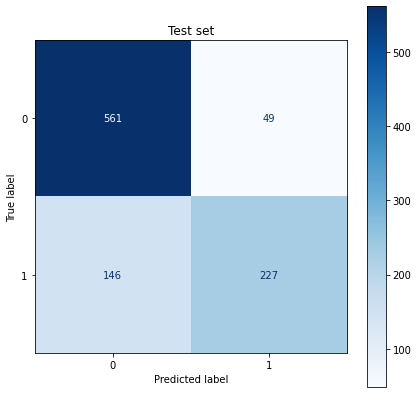

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(7,7))
ax = plt.gca()
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(cm, # confusion matrix
                              display_labels=['0', '1']) # [음성레이블, 양성레이블]
disp.plot(cmap='Blues', ax=ax) # 출력
plt.title('Test set')
plt.show()

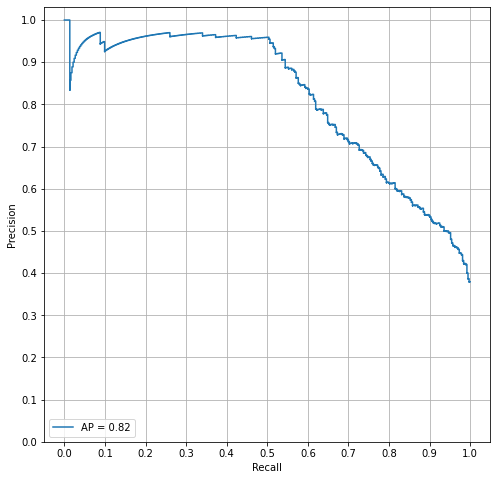

In [26]:
from sklearn.metrics import precision_score, average_precision_score,precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay 

rfc= best_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, rfc)
ap_rfc = average_precision_score(y_test, rfc)

plt.figure(figsize=(8,8))
ax = plt.gca()
disp = PrecisionRecallDisplay(precision, recall, average_precision=ap_rfc)
disp.plot(ax=ax);
plt.grid(True)
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

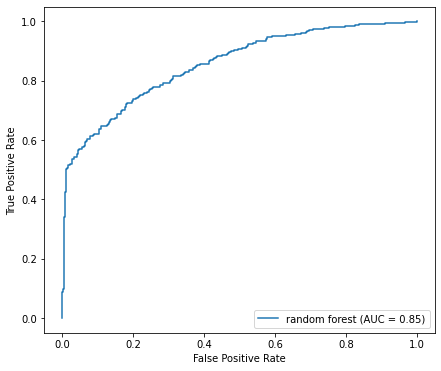

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

auc_rfc = roc_auc_score(y_test, rfc)
fprs_rfc, tprs_rfc, _ = roc_curve(y_test, rfc)


plt.figure(figsize=(7,6))
ax = plt.gca()
disp = RocCurveDisplay(fpr=fprs_rfc, tpr=tprs_rfc, roc_auc=auc_rfc, estimator_name='random forest')
disp.plot(ax=ax)
plt.show()

### Deep Learning
- MLP

In [29]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.InputLayer((9,))) 
model.add(keras.layers.Flatten())  
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, y_train, 
                  epochs=5,
                  batch_size=9,
                  validation_split=0.3 
                 )

test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/5


2022-07-19 16:50:11.288642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


179/179 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.3844

2022-07-19 16:50:15.335484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


179/179 [==============================] - 5s 13ms/step - loss: 0.0000e+00 - accuracy: 0.3844 - val_loss: 0.0000e+00 - val_accuracy: 0.4186
Epoch 2/5
179/179 [==============================] - 2s 9ms/step - loss: 0.0000e+00 - accuracy: 0.3844 - val_loss: 0.0000e+00 - val_accuracy: 0.4186
Epoch 3/5
179/179 [==============================] - 2s 9ms/step - loss: 0.0000e+00 - accuracy: 0.3844 - val_loss: 0.0000e+00 - val_accuracy: 0.4186
Epoch 4/5
179/179 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.3844 - val_loss: 0.0000e+00 - val_accuracy: 0.4186
Epoch 5/5
31/31 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3795


In [30]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 9)                 0         
                                                                 
 dense_3 (Dense)             (None, 256)               2560      
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35,585
Trainable params: 35,585
Non-trainable params: 0
_________________________________________________________________


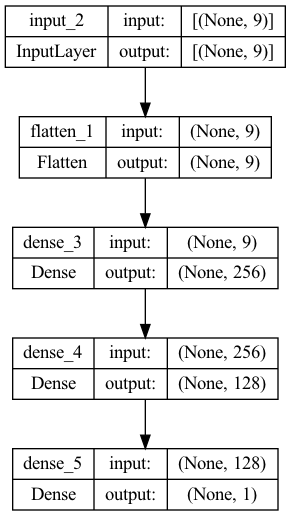

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)

30/31 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.3813

2022-07-19 16:51:17.144603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.3795


In [34]:
print(test_loss, test_acc)

0.0 0.3794506788253784


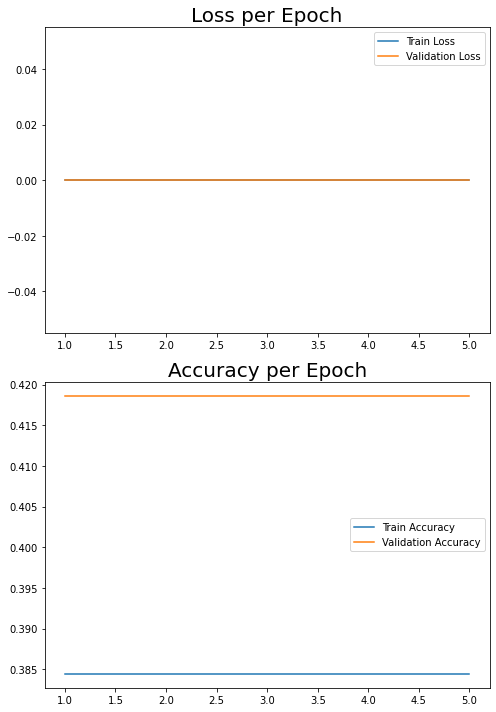

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,10))

plt.subplot(2,1,1)
plt.plot(range(1,6), hist.history['loss'], label='Train Loss')
plt.plot(range(1,6), hist.history['val_loss'], label="Validation Loss")
plt.title("Loss per Epoch", fontsize=20)
plt.legend()

plt.subplot(2,1,2)
plt.plot(range(1,6), hist.history['accuracy'], label='Train Accuracy')
plt.plot(range(1,6), hist.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy per Epoch", fontsize=20)

plt.legend()
plt.tight_layout()
plt.show()

### Deep Learning
- DNN

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

np.random.seed(0)
tf.random.set_seed(0)

In [37]:
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [38]:
X_train.shape, X_val.shape, X_test.shape

((1605, 9), (688, 9), (983, 9))

In [39]:
y_train.shape, y_val.shape, y_test.shape

((1605, 1), (688, 1), (983, 1))

In [40]:
LEARNING_RATE = 0.001
N_EPOCHS = 200
N_BATCHS = 100

N_TRAIN = X_train.shape[0]
N_VAL = X_val.shape[0]
N_TEST = X_test.shape[0]

In [41]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(N_BATCHS)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [46]:
def create_DNN_model():
    model = keras.Sequential()
    
    # 1. Flatten + Input Layer
    model.add(layers.Flatten(input_shape=(9,))) 
    
    # 2. Hidden Layer
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=64, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=64, activation='relu'))
    
    # 3. Output Layer: 다중분류-unit수: class수, 각 unit이 클래스별 확률 => activation 함수: softmax
    model.add(layers.Dense(units=1, activation='sigmoid'))
    
    return model

In [47]:
model = create_DNN_model()

model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 9)                 0         
                                                                 
 dropout_6 (Dropout)         (None, 9)                 0         
                                                                 
 batch_normalization_6 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 256)               2560      
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_7 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [49]:
hist = model.fit(train_dataset,
                 epochs=N_EPOCHS,
                 validation_data=val_dataset)

Epoch 1/200


2022-07-19 16:51:49.356900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 32ms/step - loss: 0.7254 - accuracy: 0.5331 - val_loss: 0.6875 - val_accuracy: 0.5858
Epoch 2/200
 1/16 [>.............................] - ETA: 0s - loss: 0.7316 - accuracy: 0.5400

2022-07-19 16:51:51.364275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 17ms/step - loss: 0.6864 - accuracy: 0.5881 - val_loss: 0.6795 - val_accuracy: 0.5858
Epoch 3/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6734 - accuracy: 0.6087 - val_loss: 0.6769 - val_accuracy: 0.5858
Epoch 4/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6675 - accuracy: 0.6081 - val_loss: 0.6767 - val_accuracy: 0.5858
Epoch 5/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6660 - accuracy: 0.6162 - val_loss: 0.6779 - val_accuracy: 0.5858
Epoch 6/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6729 - accuracy: 0.6250 - val_loss: 0.6766 - val_accuracy: 0.5858
Epoch 7/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6698 - accuracy: 0.6075 - val_loss: 0.6754 - val_accuracy: 0.5858
Epoch 8/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6666 - accuracy: 0.6237 - val_loss: 0.6742 - val_accuracy: 0.5872
Epoch 9/200
16/16 

16/16 [==============================] - 0s 18ms/step - loss: 0.6174 - accuracy: 0.6681 - val_loss: 0.6350 - val_accuracy: 0.6337
Epoch 60/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6301 - accuracy: 0.6594 - val_loss: 0.6349 - val_accuracy: 0.6323
Epoch 61/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6249 - accuracy: 0.6475 - val_loss: 0.6366 - val_accuracy: 0.6308
Epoch 62/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6168 - accuracy: 0.6637 - val_loss: 0.6356 - val_accuracy: 0.6337
Epoch 63/200
16/16 [==============================] - 0s 18ms/step - loss: 0.6339 - accuracy: 0.6562 - val_loss: 0.6346 - val_accuracy: 0.6308
Epoch 64/200
16/16 [==============================] - 0s 18ms/step - loss: 0.6099 - accuracy: 0.6794 - val_loss: 0.6376 - val_accuracy: 0.6337
Epoch 65/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6209 - accuracy: 0.6612 - val_loss: 0.6390 - val_accuracy: 0.6294
Epoch 66/200

16/16 [==============================] - 0s 17ms/step - loss: 0.6117 - accuracy: 0.6612 - val_loss: 0.6387 - val_accuracy: 0.6395
Epoch 117/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6003 - accuracy: 0.6719 - val_loss: 0.6406 - val_accuracy: 0.6424
Epoch 118/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6141 - accuracy: 0.6544 - val_loss: 0.6366 - val_accuracy: 0.6453
Epoch 119/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6018 - accuracy: 0.6806 - val_loss: 0.6392 - val_accuracy: 0.6453
Epoch 120/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6057 - accuracy: 0.6775 - val_loss: 0.6367 - val_accuracy: 0.6483
Epoch 121/200
16/16 [==============================] - 0s 18ms/step - loss: 0.6085 - accuracy: 0.6644 - val_loss: 0.6357 - val_accuracy: 0.6453
Epoch 122/200
16/16 [==============================] - 0s 17ms/step - loss: 0.6056 - accuracy: 0.6712 - val_loss: 0.6347 - val_accuracy: 0.6410
Epoch 

Epoch 173/200
16/16 [==============================] - 0s 17ms/step - loss: 0.5833 - accuracy: 0.6900 - val_loss: 0.6388 - val_accuracy: 0.6439
Epoch 174/200
16/16 [==============================] - 0s 17ms/step - loss: 0.5810 - accuracy: 0.6919 - val_loss: 0.6429 - val_accuracy: 0.6294
Epoch 175/200
16/16 [==============================] - 0s 16ms/step - loss: 0.5767 - accuracy: 0.6994 - val_loss: 0.6415 - val_accuracy: 0.6323
Epoch 176/200
16/16 [==============================] - 0s 16ms/step - loss: 0.5857 - accuracy: 0.6887 - val_loss: 0.6416 - val_accuracy: 0.6410
Epoch 177/200
16/16 [==============================] - 0s 16ms/step - loss: 0.5815 - accuracy: 0.6862 - val_loss: 0.6433 - val_accuracy: 0.6337
Epoch 178/200
16/16 [==============================] - 0s 17ms/step - loss: 0.5876 - accuracy: 0.6794 - val_loss: 0.6439 - val_accuracy: 0.6366
Epoch 179/200
16/16 [==============================] - 0s 17ms/step - loss: 0.5894 - accuracy: 0.6875 - val_loss: 0.6449 - val_accuracy:

/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages

/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages

/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/han-yechan/miniforge3/envs/tf/lib/python3.8/site-packages

In [ ]:
loss, acc = model.evaluate(test_dataset)

In [ ]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='validation loss')
plt.title("LOSS", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
new_data = X_test[:5]
pred = model.predict(new_data)
threshold = 0.5
result = (pred > threshold).astype(np.int8)
result

In [ ]:
y_test[:5]